In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
!pip install git+https://github.com/indra-ipd/scipy.git

  Cloning https://github.com/indra-ipd/scipy.git to /tmp/pip-req-build-kmgfet3t
  Running command git clone -q https://github.com/indra-ipd/scipy.git /tmp/pip-req-build-kmgfet3t
  Running command git submodule update --init --recursive -q
  From https://github.com/scipy/boost-headers-only
   * branch            2110ce20e59917b85b12059b3ddd8b133549f662 -> FETCH_HEAD
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scipy: filename=scipy-1.7.0.dev0+1032.253cdda-cp37-cp37m-linux_x86_64.whl size=56685183 sha256=5236ce7ac470dc858b50528353b9e3c84e3a3076eebf781c53e06b58771048d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-htdrj0f6/wheels/3d/e4/26/f8c192c4555c2f4643b23b020176fb3638f7fd22c1069269d6
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency res

In [ ]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
logging.disable(sys.maxsize)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import collections
import time
from sklearn import datasets

In [ ]:
def one_hot(dat):
    x = [0,0,0,0,0,0,0,0,0,0]
    labs = []
    for i in dat:
        x[i] = 1
        labs.append(x)
        x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    return labs
#8x8MNIST

mnist8 = datasets.load_digits()
data,label = mnist8.images,mnist8.target
n_samples = len(mnist8.images)
data = mnist8.images.reshape((n_samples, -1))
target = one_hot( mnist8.target)
target = np.asarray(target)
Xtrain,Ytrain = data[:(2*n_samples) // 3],target[:(2*n_samples) // 3]
Xtest,Ytest = data[(2*n_samples) // 3:], target[(2*n_samples) // 3:]

seed = np.random.randint(100)
tf.set_random_seed(seed)
image_size = 8
chan_num = 1
labels_size = 10
learning_rate = 0.001
batch_size = 64
batches = int(len(Ytrain) / batch_size)
iterations = batches

epoch = 25

algo = ['oMoQ','oNAQ','oBFGS','Adam']
col = {'oNAQ': 'b', 'oMoQ': 'm', 'oBFGS': 'g', 'oLNAQ': '#00CED1', 'oLMoQ': '#DAA520', 'oLBFGS': '#90EE90','Adam': 'r'}


In [ ]:
training_data = tf.placeholder(tf.float32, [None, image_size*image_size*chan_num])
labels = tf.placeholder(tf.float32, [None, labels_size])

L1 = tf.contrib.layers.fully_connected(inputs=training_data, num_outputs=20, activation_fn=tf.nn.relu,normalizer_fn=tf.contrib.layers.batch_norm)
L2 = tf.contrib.layers.fully_connected(inputs=L1, num_outputs=10, activation_fn=tf.nn.relu,normalizer_fn=tf.contrib.layers.batch_norm)
#L3 = tf.contrib.layers.fully_connected(inputs=L2, num_outputs=16, activation_fn=tf.nn.sigmoid)
output = tf.contrib.layers.fully_connected(inputs=L2, num_outputs=10, activation_fn=tf.nn.softmax)

#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=output))
loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [ ]:
perm_idx = []
for num in range(500):
    perm_idx.append(np.random.permutation(len(Ytrain)))



def get_batches(x_tr,y_tr, size,ep_num):

    #shuffle data
    #idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num-1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr)/size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i*size:i*size+size])
        lab.append(y_tr[i * size:i * size + size])
    return data,lab

def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a

count = 0

Initial Error of  oMoQ  :  2.2960293
EPOCH  1  : ##########
Parameters:  1620
Step 0; train loss 1.7989635467529297; train accuracy 39.0625; test loss 2.0941452980041504; test accuracy 26.377296447753906; alpha 0.5; mu 0.8
EPOCH  2  : ##########
Step 0; train loss 0.21826136112213135; train accuracy 96.875; test loss 0.4714429974555969; test accuracy 87.81301975250244; alpha 0.22941573387056174; mu 0.8
EPOCH  3  : ##########
Step 0; train loss 0.21611547470092773; train accuracy 92.1875; test loss 0.3700493276119232; test accuracy 89.81636166572571; alpha 0.1643989873053573; mu 0.8
EPOCH  4  : ##########
Step 0; train loss 0.07212136685848236; train accuracy 98.4375; test loss 0.30088019371032715; test accuracy 91.3188636302948; alpha 0.13483997249264842; mu 0.8
EPOCH  5  : ##########
Step 0; train loss 0.04558674246072769; train accuracy 98.4375; test loss 0.2640151083469391; test accuracy 92.3205316066742; alpha 0.11704114719613057; mu 0.8
EPOCH  6  : ##########
Step 0; train loss 0.

/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 0; train loss 1.6843116283416748; train accuracy 50.0; test loss 2.033021926879883; test accuracy 30.717861652374268; alpha 0.8815426997245179; mu 0
EPOCH  2  : ##########
Step 0; train loss 0.3167782425880432; train accuracy 96.875; test loss 0.5753602385520935; test accuracy 89.14858102798462; alpha 0.3343782654127482; mu 0
EPOCH  3  : ##########
Step 0; train loss 0.2043633610010147; train accuracy 93.75; test loss 0.37664908170700073; test accuracy 90.65108299255371; alpha 0.20631850419084463; mu 0
EPOCH  4  : ##########
Step 0; train loss 0.09124181419610977; train accuracy 100.0; test loss 0.3321850001811981; test accuracy 91.65275692939758; alpha 0.14918414918414918; mu 0
EPOCH  5  : ##########
Step 0; train loss 0.07857780158519745; train accuracy 100.0; test loss 0.32176709175109863; test accuracy 91.65275692939758; alpha 0.11683096020445419; mu 0
EPOCH  6  : ##########
Step 0; train loss 0.059852536767721176; train accuracy 100.0; test loss 0.31785449385643005; test accu

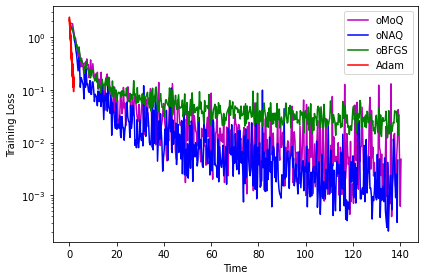

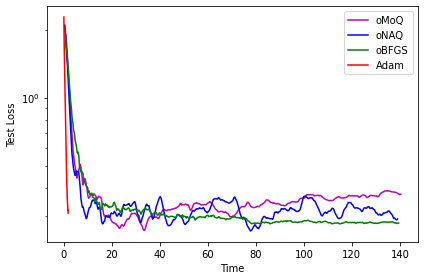

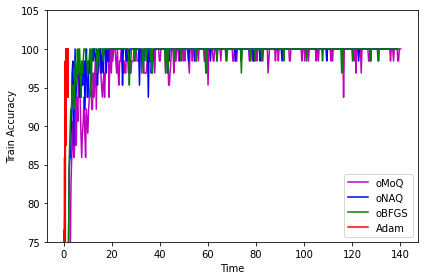

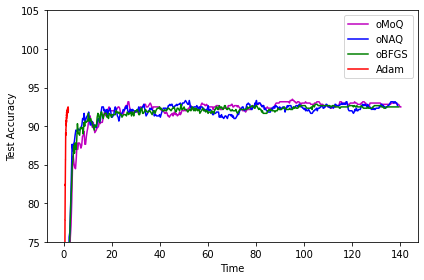

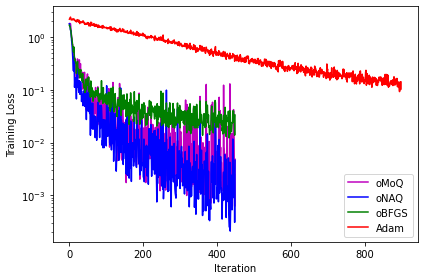

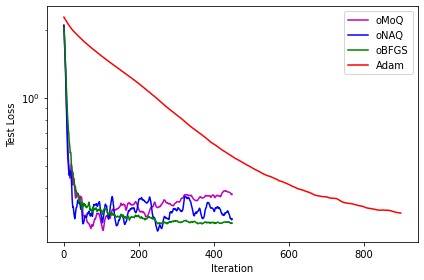

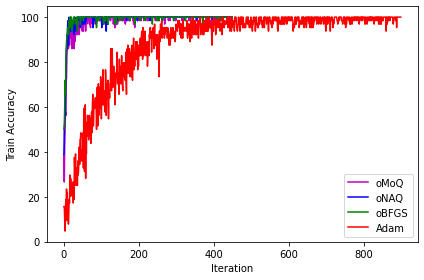

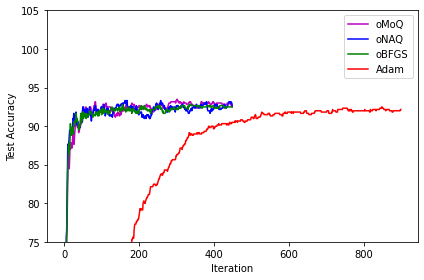

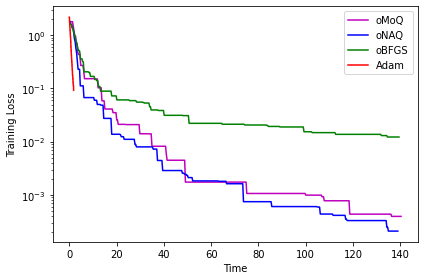

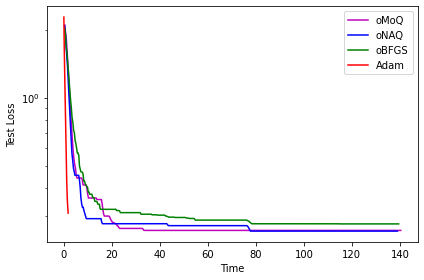

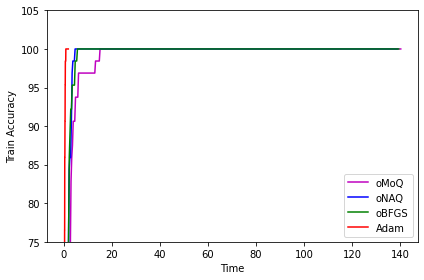

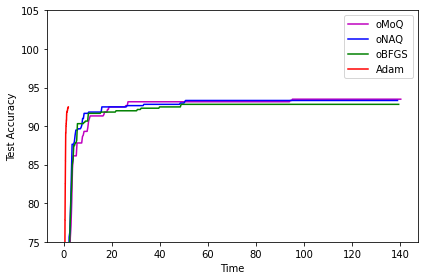

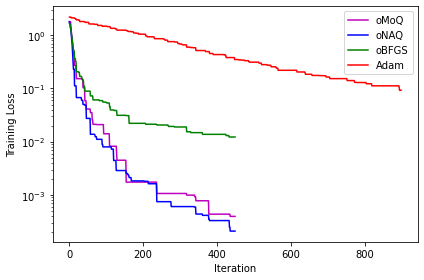

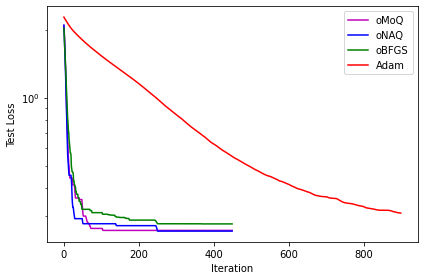

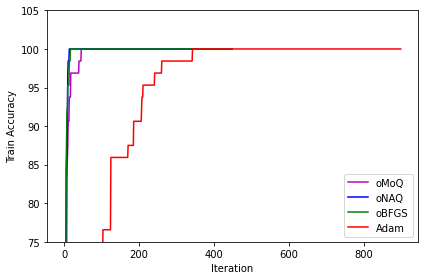

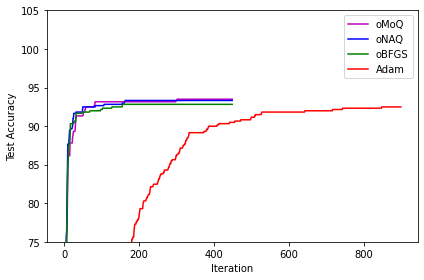

In [ ]:
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)
        epoch = 50
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

    else:
        m = 4
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        Hk_mat = collections.deque(maxlen=1)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)

        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oNAQ' or meth == 'oBFGS' or meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot': timePlt, 'err': errPlt, 'Hk_mat':Hk_mat,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oMoQ' or meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            # grad_curr = collections.deque(maxlen=1)
            # grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         # 'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot': timePlt, 'err': errPlt, 'gfk_vec': gfk_vec,'Hk_mat':Hk_mat,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = batch_size / (batch_size + 2)

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []

    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1

        alpha_k.append(alpha_k[-1] * 0.9)
        alpha_k.append(np.maximum(alpha_k[-1],0.001))
        # alpha_k.append(0.5)
        Xtr, Ytr = get_batches(Xtrain, Ytrain, batch_size, ep)
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end - start)



            else:

                if meth != 'oMoQ' or meth != 'oLMoQ':
                    if step > 1:
                        alpha_k.append(1 / np.sqrt(step))
                    else:
                        alpha_k.append(0.5)

                    # if meth == 'oMoQ':
                    #  if step > 1:
                    #    alpha_k.append(10 / (10+step))

                if meth == 'oBFGS' or meth == 'oLBFGS':
                    alpha_k.append(eta0 * (10 / (10 + step)))
                    mu_val.append(0)
                    mu = mu_val[-1]

                if meth == 'oNAQ' or meth == 'oLNAQ':

                    mu_val.append(0.8)
                    mu = mu_val[-1]

                if meth == 'oMoQ' or meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1

                    mu_val.append(0.8)
                    mu = mu_val[-1]

                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)

            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)

            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))

    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt), train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((75, 105))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((75, 105))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(5)
    plt.semilogy(train_loss_plot, color)
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(6)
    plt.semilogy(test_loss_plot, color)
    plt.xlabel('Iteration')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(7)
    plt.plot(train_acc_plot, color)
    # plt.ylim((75, 105))
    plt.xlabel('Iteration')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(8)
    plt.plot(test_acc_plot, color)
    plt.ylim((75, 105))
    plt.xlabel('Iteration')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(9)
    plt.semilogy(np.cumsum(timePlt), np.minimum.accumulate(train_loss_plot), color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(10)
    plt.semilogy(np.cumsum(timePlt), np.minimum.accumulate(test_loss_plot), color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(11)
    plt.plot(np.cumsum(timePlt), np.maximum.accumulate(train_acc_plot), color)
    plt.ylim((75, 105))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(12)
    plt.plot(np.cumsum(timePlt), np.maximum.accumulate(test_acc_plot), color)
    plt.ylim((75, 105))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(13)
    plt.semilogy(np.minimum.accumulate(train_loss_plot), color)
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(14)
    plt.semilogy(np.minimum.accumulate(test_loss_plot), color)
    plt.xlabel('Iteration')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(15)
    plt.plot(np.maximum.accumulate(train_acc_plot), color)
    plt.ylim((75, 105))
    plt.xlabel('Iteration')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(16)
    plt.plot(np.maximum.accumulate(test_acc_plot), color)
    plt.ylim((75, 105))
    plt.xlabel('Iteration')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()